# Chapter 3. Homework

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [135]:
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')

In [136]:
num_cols = [col for col in df.columns if col not in cat_cols]
num_cols

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [137]:
df[cat_cols] = df[cat_cols].fillna("NA")
df[num_cols] = df[num_cols].fillna(0.0)
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


## Question 1. 
**Retail** is the most frequent industry

In [138]:
df.industry.value_counts().sort_values()

industry
NA               134
manufacturing    174
technology       179
healthcare       187
education        187
other            198
finance          200
retail           203
Name: count, dtype: int64

## Question 2.
Annual_income and Interaction_count are the most correlated at 0,027

In [139]:
num_cols

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [140]:
num_cols_copy = num_cols.copy()
num_cols_copy.pop()
num_cols_copy

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [199]:
corr_df = df[num_cols_copy].corr().abs()
corr_df

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,0.023565,0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,0.023565,0.027036,1.000000,0.009888
lead_score,0.004879,0.015610,0.009888,1.000000


In [200]:
for i, col in enumerate(num_cols_copy):
    corr_df.loc[col, col] = 0
corr_df


,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,0.000000,0.009770,0.023565,0.004879
annual_income,0.009770,0.000000,0.027036,0.015610
interaction_count,0.023565,0.027036,0.000000,0.009888
lead_score,0.004879,0.015610,0.009888,0.000000


In [201]:
corr_df.max()

number_of_courses_viewed    0.023565
annual_income               0.027036
interaction_count           0.027036
lead_score                  0.015610
dtype: float64

In [142]:
# These should give the same result
corr_df = df[num_cols].corr()
for col in num_cols:
    print(corr_df[col].sort_values(ascending=False)[1])

0.43591365802117926
0.05313144169625205
0.37457251779940415
0.19367349758690264
0.43591365802117926


/tmp/ipykernel_2185/2210189123.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(corr_df[col].sort_values(ascending=False)[1])


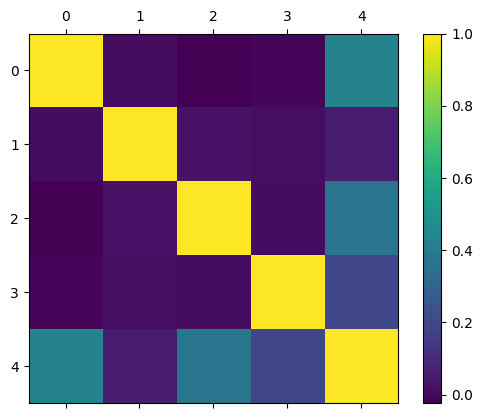

In [143]:
#plt.matshow(correlations)
alpha = list(num_cols)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, interpolation='nearest')

fig.colorbar(cax)

plt.show()

## Splitting the Data

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
# The train/val test split
n = 0.2
SEED = 42

In [146]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [147]:
df_full_train, df_test = train_test_split(df, test_size=n, random_state=SEED)
#df_full_train, df_test = train_test_split(df, test_size=n)

In [148]:
df_train, df_val = train_test_split(df_full_train, test_size=n/(1-n), random_state=SEED)
#df_train, df_val = train_test_split(df_full_train, test_size=n/(1-n))

In [149]:
df_train.shape, df_val.shape, df_test.shape

((876, 9), (293, 9), (293, 9))

In [150]:
y_full_train = df_full_train.converted
y_train = df_train.converted
y_val = df_val.converted
y_test = df_test.converted

In [151]:
del df_full_train["converted"]
del df_train["converted"]
del df_val["converted"]
del df_test["converted"]

In [152]:
#df_full_train = df_full_train.reset_index(drop=True)
#df_train = df_train.reset_index(drop=True)
#df_val = df_val.reset_index(drop=True)
#df_test = df_test.reset_index(drop=True)

In [153]:
#y_full_train = y_full_train.reset_index(drop=True)
#y_train = y_train.reset_index(drop=True)
#y_val = y_val.reset_index(drop=True)
#y_test = y_test.reset_index(drop=True)

## Question 3.
Lead_source has the highest mutual score at 0.04

In [154]:
# Calculate mutual information
from sklearn.metrics import mutual_info_score

In [155]:
mutual_info_score?

Signature: mutual_info_score(labels_true, labels_pred, *, contingency=None)
Docstring:
Mutual Information between two clusterings.

The Mutual Information is a measure of the similarity between two labels
of the same data. Where :math:`|U_i|` is the number of the samples
in cluster :math:`U_i` and :math:`|V_j|` is the number of the
samples in cluster :math:`V_j`, the Mutual Information
between clusterings :math:`U` and :math:`V` is given as:

.. math::

    MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
    \log\frac{N|U_i \cap V_j|}{|U_i||V_j|}

This metric is independent of the absolute values of the labels:
a permutation of the class or cluster label values won't change the
score value in any way.

This metric is furthermore symmetric: switching :math:`U` (i.e
``label_true``) with :math:`V` (i.e. ``label_pred``) will return the
same score value. This can be useful to measure the agreement of two
independent label assignments strategies on the same dataset when the

In [156]:
scores = {}
for c in cat_cols:
    scores[c] = round(mutual_info_score(df_train[c], y_train), 2)
scores

{'lead_source': 0.04,
 'industry': 0.01,
 'employment_status': 0.01,
 'location': 0.0}

## Question 4.
We are getting an accuracy of 0.69. This is likely due to differences in library versions. Changing the SEED seems to shift the accuracy more towards 0.74

In [157]:
from sklearn.feature_extraction import DictVectorizer

In [158]:
df_full_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
1066,social_media,manufacturing,2,44403.0,self_employed,australia,1,0.71
638,events,retail,3,38048.0,student,north_america,6,0.97
799,social_media,education,2,71399.0,NA,europe,1,0.51
380,referral,education,2,47912.0,employed,australia,1,0.04
303,paid_ads,healthcare,1,34806.0,employed,europe,4,0.32


In [159]:
cat_cols = list(df_full_train.select_dtypes("object").columns)
cat_cols

['lead_source', 'industry', 'employment_status', 'location']

In [160]:
num_cols = list(df_full_train.dtypes[df_full_train.dtypes != "object"].index)

In [161]:
full_train_dicts = df_full_train[num_cols + cat_cols].to_dict(orient="records")
full_train_dicts[:5]

[{'number_of_courses_viewed': 2,
  'annual_income': 44403.0,
  'interaction_count': 1,
  'lead_score': 0.71,
  'lead_source': 'social_media',
  'industry': 'manufacturing',
  'employment_status': 'self_employed',
  'location': 'australia'},
 {'number_of_courses_viewed': 3,
  'annual_income': 38048.0,
  'interaction_count': 6,
  'lead_score': 0.97,
  'lead_source': 'events',
  'industry': 'retail',
  'employment_status': 'student',
  'location': 'north_america'},
 {'number_of_courses_viewed': 2,
  'annual_income': 71399.0,
  'interaction_count': 1,
  'lead_score': 0.51,
  'lead_source': 'social_media',
  'industry': 'education',
  'employment_status': 'NA',
  'location': 'europe'},
 {'number_of_courses_viewed': 2,
  'annual_income': 47912.0,
  'interaction_count': 1,
  'lead_score': 0.04,
  'lead_source': 'referral',
  'industry': 'education',
  'employment_status': 'employed',
  'location': 'australia'},
 {'number_of_courses_viewed': 1,
  'annual_income': 34806.0,
  'interaction_count'

In [162]:
train_dicts = df_train.to_dict(orient="records")
val_dicts = df_val.to_dict(orient="records")
test_dicts = df_test.to_dict(orient="records")

In [163]:
dv = DictVectorizer(sparse=False)
dv.fit_transform(train_dicts)
train_cols = dv.transform(train_dicts)
val_cols = dv.transform(val_dicts)
test_cols = dv.transform(test_dicts)

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=SEED)

In [166]:
model.fit(train_cols, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [167]:
y_pred = model.predict_proba(val_cols)
y_pred[:5]

array([[0.38807837, 0.61192163],
       [0.20017383, 0.79982617],
       [0.46978656, 0.53021344],
       [0.52868521, 0.47131479],
       [0.42933868, 0.57066132]])

In [168]:
y_pred = y_pred[:, 1]
y_pred[:5]

array([0.61192163, 0.79982617, 0.53021344, 0.47131479, 0.57066132])

In [169]:
(y_val == (y_pred >= 0.5).astype(int)).astype(int).mean()

np.float64(0.6996587030716723)

In [170]:
len(val_cols[0])

31

In [171]:
y_pred2 = model.predict(val_cols)
y_pred2

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0])

In [172]:
accuracy = (y_pred2 == y_val).mean()
accuracy

np.float64(0.6996587030716723)

In [173]:
from sklearn.metrics import accuracy_score

In [174]:
#1:     np.float64(0.6996587030716723)
#2:     np.float64(0.726962457337884)
#3:     np.float64(0.7542662116040956)
#42:    np.float64(0.6996587030716723)
#1241:  np.float64(0.764505119453925)

In [175]:
# This gives the same result as calculating the mean.
accuracy_score(y_val, (y_pred > 0.5).astype(int))

0.6996587030716723

The accuracy is varying depending on the seed, and it is likely that the version of the different install packages is causing the drift in accuracy. 

## **Question 5**

It appears as though the `Industry` field is the least important, having no effect on the accuracy

In [176]:
features = num_cols + cat_cols
features

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'lead_source',
 'industry',
 'employment_status',
 'location']

In [177]:
df_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
1077,paid_ads,retail,0,58472.0,student,middle_east,5,0.03
463,organic_search,manufacturing,3,71738.0,student,middle_east,6,0.77
842,paid_ads,technology,3,81973.0,employed,north_america,2,0.59
835,NA,technology,1,74956.0,employed,europe,3,0.34
837,organic_search,retail,3,59335.0,student,australia,1,0.98
...,...,...,...,...,...,...,...,...
725,organic_search,other,1,43907.0,employed,australia,4,0.33
401,social_media,retail,3,64969.0,employed,north_america,1,0.18
957,NA,education,3,89042.0,employed,asia,4,0.75
992,social_media,manufacturing,1,0.0,self_employed,europe,1,0.65


In [178]:
accuracies = pd.DataFrame(columns=['feature', 'accuracy', 'diff'])
accuracies.head()

,feature,accuracy,diff


In [179]:
# We want to train a new model and measure the accuracy while excluding a certain feature

for i, f in enumerate(features):
    print(i)
    df_train_copy = df_train.copy()
    del df_train_copy[f]

    df_val_copy = df_val.copy()

    train_dicts = df_train_copy.to_dict(orient="records")
    val_dicts = df_val_copy.to_dict(orient="records")

    dv = DictVectorizer(sparse=False)

    dv.fit(train_dicts)
    X_train = dv.transform(train_dicts)
    X_val = dv.transform(val_dicts)


    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=SEED)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    y_pred = (y_pred >= 0.5).astype(int)

    new_accuracy = accuracy_score(y_val, y_pred)
    row = [f, new_accuracy, accuracy - new_accuracy]
    accuracies.loc[i] = row

accuracies

0
1
2
3
4
5
6
7


,feature,accuracy,diff
0,number_of_courses_viewed,0.556314,0.143345
1,annual_income,0.853242,-0.153584
2,interaction_count,0.556314,0.143345
3,lead_score,0.706485,-0.006826
4,lead_source,0.703072,-0.003413
5,industry,0.699659,0.000000
6,employment_status,0.696246,0.003413
7,location,0.709898,-0.010239


In [180]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [181]:
train_cols = df_train[features].to_dict(orient="records")
val_cols = df_val[features].to_dict(orient="records")

dv = DictVectorizer(sparse=False)
dv.fit(train_cols)

X_train = dv.transform(train_cols)
X_val = dv.transform(val_cols)


X_train.shape, X_val.shape

((876, 31), (293, 31))

## Question 6.
Across the different solvers, it appears that a C=1.0 gives the best accuracy score.

In [182]:
model_results = pd.DataFrame(columns=["model", "C", "accuracy"])

models = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
Cs = [0.01, 0.1, 1, 10, 100]
for m in models:
    for c in Cs:
        model = LogisticRegression(solver=m, C=c, max_iter=3000, random_state=SEED)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred = (y_pred >= 0.5).astype(int)
        new_accuracy = accuracy_score(y_val, y_pred)
        print(f"C={c}, accuracy={round(new_accuracy, 6)}")
        model_results.loc[len(model_results)] = [m, c, new_accuracy]
model_results

C=0.01, accuracy=0.812287
C=0.1, accuracy=0.843003


C=1, accuracy=0.856655
C=10, accuracy=0.853242
C=100, accuracy=0.853242
C=0.01, accuracy=0.699659
C=0.1, accuracy=0.699659
C=1, accuracy=0.699659
C=10, accuracy=0.699659
C=100, accuracy=0.699659
C=0.01, accuracy=0.812287
C=0.1, accuracy=0.843003


/home/codespace/.local/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/codespace/.local/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


C=1, accuracy=0.856655
C=10, accuracy=0.853242
C=100, accuracy=0.853242
C=0.01, accuracy=0.812287
C=0.1, accuracy=0.843003
C=1, accuracy=0.856655
C=10, accuracy=0.853242
C=100, accuracy=0.853242


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.01, accuracy=0.556314


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.1, accuracy=0.556314


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=1, accuracy=0.556314


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=10, accuracy=0.556314


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=100, accuracy=0.556314


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.01, accuracy=0.556314


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.1, accuracy=0.556314


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=1, accuracy=0.556314


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=10, accuracy=0.556314
C=100, accuracy=0.556314


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,model,C,accuracy
0,lbfgs,0.01,0.812287
1,lbfgs,0.10,0.843003
2,lbfgs,1.00,0.856655
3,lbfgs,10.00,0.853242
4,lbfgs,100.00,0.853242
5,liblinear,0.01,0.699659
6,liblinear,0.10,0.699659
7,liblinear,1.00,0.699659
8,liblinear,10.00,0.699659
9,liblinear,100.00,0.699659


In [183]:
test = pd.DataFrame(columns=['a', 'b', 'c'])
print(test.head())

Empty DataFrame
Columns: [a, b, c]
Index: []
